<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/%5BESPEC%5D%20Fundamentos%20Aprendizagem%20M%C3%A1quina/T%C3%B3pico%2002%20-%20Aprendizado-Supervisionado%20-%20KNN/T%C3%B3pico_02_Aprendizado_Supervisionado_KNN_Lectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial KNN

Neste tutorial, iniciaremos nossas práticas de aprendizado de máquina utilizando a biblioteca scikit-learn, que é uma das principais ferramentas de aprendizado de máquina em Python.

Dentre os algoritmos de classificação disponíveis nesta biblioteca, vamos começar com o KNN, que significa "K-Nearest Neighbors" ou "K-Vizinhos Mais Próximos". Esse algoritmo é um dos mais simples e populares da área de aprendizado de máquina.

O KNN é um método não-paramétrico de classificação, ou seja, ele não assume nada sobre a distribuição dos dados. O funcionamento do algoritmo se baseia na ideia de que amostras semelhantes tendem a estar próximas umas das outras no espaço de atributos.

Dado um conjunto de dados de treinamento com amostras já classificadas, o KNN determina a classe de uma amostra de teste a partir dos K vizinhos mais próximos a ela no espaço de atributos. A classe da amostra de teste é determinada por voto majoritário entre as classes dos seus K vizinhos mais próximos.

Abaixo ilustra-se o KNN:

> > > > > 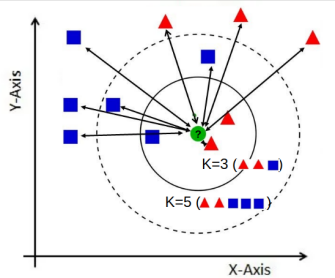

#Dataset sintético

  Utilizamos a função make_blobs() para criar uma distribuição de dados que será usada para avaliar o desempenho do KNN. Essa função permite criar conjuntos de dados artificiais com uma determinada quantidade de centroídes e diferentes desvios-padrão.

No entanto, mais adiante no tutorial, produziremos distribuições de dados mais complexas, que permitirão avaliar o desempenho do KNN em situações mais desafiadoras. Dessa forma, poderemos entender melhor as limitações e os pontos fortes do algoritmo, bem como explorar diferentes técnicas para melhorar sua eficiência.

In [28]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

random_seed=9999

#centro de massa da distribuição
centers = [[1, 2], [1, 3], [2, 5]]
n_classes = len(centers)

#criação da distribuição (300 instâncias 2 features)
data, labels = make_blobs(n_samples=300, n_features=2,
                          centers=np.array(centers),
                          random_state=random_seed)

for sample, label in zip(data[:100],labels[:100]):
  print(sample, label)


[1.88251299 0.21776835] 0
[-0.14158407  0.56091061] 0
[2.23809819 3.45613494] 1
[1.38615696 5.5106381 ] 2
[2.37055279 5.60774395] 2
[2.17995786 4.41664478] 2
[3.38621013 5.4870083 ] 2
[-0.19880191  4.93170517] 0
[1.11984837 2.18259889] 0
[1.23151031 2.51579089] 1
[0.61658498 1.92931833] 0
[0.07765177 3.55928798] 0
[2.20605129 1.19947207] 0
[2.53612979 4.180248  ] 2
[1.15897379 3.48653291] 0
[1.57737178 5.31242704] 2
[2.78495885 3.697368  ] 2
[0.21821083 0.96765413] 0
[1.40272546 5.92227941] 2
[2.43857946 1.34829105] 0
[2.151165   5.74020122] 2
[1.81294614 4.47523075] 1
[0.43351851 0.57765134] 0
[0.8351227  3.84602613] 2
[1.05224303 1.75297034] 0
[1.13333483 3.55870787] 1
[0.55801606 3.9923059 ] 0
[-0.70722147  3.16246952] 0
[-0.47971267  1.82308397] 0
[2.20706604 5.84773739] 2
[2.62571197 5.3623291 ] 2
[2.05026588 6.29554486] 2
[0.9532259  2.35693757] 1
[1.94140025 2.467714  ] 1
[1.77381716 3.8490483 ] 2
[4.39830875 5.7623534 ] 2
[1.09830888 4.40449449] 2
[1.51654693 4.62524272] 2
[0.1

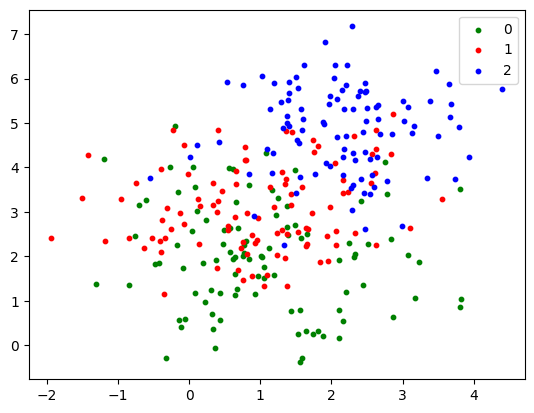

In [29]:
#Exibição
colours = ('green', 'red', 'blue')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], s=10, label=str(n_class))



ax.legend(loc='upper right');

#Preparação dos dados

Uma etapa crucial no aprendizado de máquina é a preparação dos dados. Esta etapa inclui normalmente:


*   Análise Exploratória
*   Normalização
*   Método de Validação





##Holdout (Train-Val | Test)

In [30]:
#70% treino - 30% test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

#Porção do treinamento fica para validação (70-30)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)



In [31]:
print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

(147, 2)
(63, 2)
(90, 2)


#Criação do modelo com seus hiper-parâmetros


*   Distância
*   K-Vizinhos




In [32]:
from sklearn.neighbors import KNeighborsClassifier

#p=1 ~ Manhattan Distance
#p=2 ~ Euclidean
#p!=1|2 ~ minkowski
knn = KNeighborsClassifier(metric='minkowski',
                           p=2,
                           n_neighbors=5)


knn.fit(train_data,train_labels)


KNeighborsClassifier()

#Teste do modelo

In [33]:
#computa as classes para todos
predicts = knn.predict(test_data)
print("Pred: ", predicts.shape)
print("Pred: ", predicts)
print("True: ", test_labels)
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_labels,predicts)
print(acc)

Pred:  (90,)
Pred:  [1 0 1 2 1 1 1 2 1 1 1 1 2 1 1 1 0 1 1 1 1 0 1 2 0 2 0 1 1 1 2 1 1 0 1 0 2
 2 0 1 0 1 0 1 1 0 0 2 1 1 2 1 2 0 2 1 1 1 1 0 0 1 1 2 1 2 0 1 2 1 2 1 1 0
 2 1 0 1 2 0 2 2 0 2 0 1 2 0 2 2]
True:  [0 0 0 2 0 1 1 2 1 0 1 1 2 1 2 0 0 0 1 0 0 0 0 2 1 2 0 1 1 1 1 2 0 0 0 0 2
 2 1 0 0 1 0 2 1 0 0 0 1 2 2 1 2 0 2 0 0 1 0 1 0 2 1 2 1 2 0 0 2 0 2 1 1 0
 2 2 1 2 1 0 2 2 0 2 0 0 2 0 1 2]
0.6333333333333333


###Metricas de Avaliação
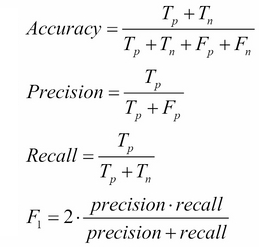

In [ ]:
from sklearn.metrics import accuracy_score
example_predictions = [0, 2, 1, 3, 2, 0, 1, 2, 0]
example_labels      = [0, 2, 2, 3, 2, 1, 1, 1, 1]
acc = accuracy_score(example_labels,example_predictions)
print(f'Acc: {acc}')

Acc: 0.5555555555555556


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(example_labels,example_predictions))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.50      0.25      0.33         4
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         1

    accuracy                           0.56         9
   macro avg       0.62      0.73      0.62         9
weighted avg       0.59      0.56      0.54         9



#Analise Crítica
Vamos analisar o desempenho do KNN quanto:


*   Distribuição
*   K Vizinhos
*   Quantidade de amostras




(600, 2) (600,)
[6.30767766 9.4273472 ] 2
[3.18316788 3.31923713] 1
[3.38548376 4.47224211] 1
[6.39005955 9.98077626] 2
[8.56118722 9.10794944] 2
[6.66226773 7.55377519] 2
[3.92234683 3.10564559] 1
[9.39932768 6.01443848] 2
[1.08580722 3.32468755] 0
[2.64943922 4.38894181] 1


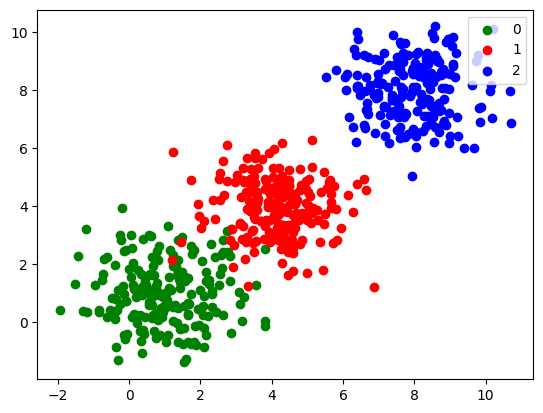


Acc: 0.9682539682539683

K 3
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.95      0.95      0.95        43
           2       0.97      1.00      0.99        36

    accuracy                           0.97       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126


Acc: 0.9761904761904762

K 6
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.95      0.98      0.97        43
           2       1.00      1.00      1.00        36

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126


Acc: 0.9761904761904762

K 9
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.95      0.98      

In [44]:
#centro de massa da distribuição
centers = [[1, 1], [4, 4], [8, 8]]
n_classes = len(centers)

#criação da distribuição (300 instâncias 2 features)
data, labels = make_blobs(n_samples=600, n_features=2,
                          centers=np.array(centers),
                          random_state=random_seed)


print(data.shape, labels.shape)

for sample, label in zip(data[:10],labels[:10]):
  print(sample, label)




#Exibição

colours = ('green', 'red', 'blue','yellow',
           'purple','salmon','orange',
           'brown','greenyellow','gray')

n_classes = len(np.unique(labels))

fig, ax = plt.subplots()
for n_class in range(0, n_classes):

    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], label=str(n_class))

ax.legend(loc='upper right')

plt.show()
#70% treino - 30% test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

#Porção do treinamento fica para validação (70-30)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

for k in range(3,21,3):
  knn = KNeighborsClassifier(metric='minkowski',
                           p=2,
                           n_neighbors=k)


  knn.fit(train_data,train_labels)

  predicts = knn.predict(val_data)

  acc = accuracy_score(predicts, val_labels)
  print(f'\nAcc: {acc}\n')

  print(f"K {k}")
  print(classification_report(val_labels,predicts))


In [45]:
knn = KNeighborsClassifier(metric='minkowski',
                           p=2,
                           n_neighbors=9)


knn.fit(train_data,train_labels)

predicts = knn.predict(test_data)

acc = accuracy_score(predicts, test_labels)
print(f'\nAcc: {acc}\n')

print(f"K {k}")
print(classification_report(test_labels,predicts))



Acc: 0.9777777777777777

K 18
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       0.95      0.98      0.96        55
           2       1.00      1.00      1.00        59

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



# Classificação de Bases Reais

https://scikit-learn.org/stable/datasets/toy_dataset.html

In [47]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
import pandas as pd

df = load_wine(as_frame=True).frame

df.sample(frac=1).head()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0,0
18,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680.0,0
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0,1
20,14.06,1.63,2.28,16.0,126.0,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780.0,0


In [48]:
df.sample(frac=1).head(15)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
84,11.84,0.89,2.58,18.0,94.0,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520.0,1
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
34,13.51,1.80,2.65,19.0,110.0,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095.0,0
157,12.45,3.03,2.64,27.0,97.0,1.90,0.58,0.63,1.14,7.50,0.67,1.73,880.0,2
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0,1
27,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0,0
85,12.67,0.98,2.24,18.0,99.0,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450.0,1
103,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1


(569, 30) (569,)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] 0


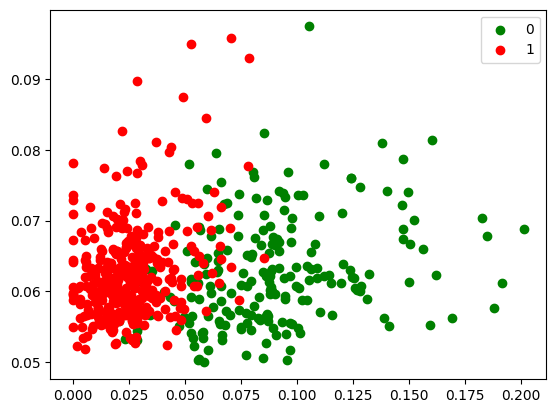

In [50]:
#Carrego a base como vetores numpy
data,labels = load_breast_cancer(return_X_y=True)
print(data.shape, labels.shape)

print(data[0],labels[0])
#Exibição

colours = ('green', 'red', 'blue','yellow',
           'purple','salmon','orange',
           'brown','greenyellow','gray')

n_classes = len(np.unique(labels))

fig, ax = plt.subplots()
for n_class in range(0, n_classes):

    ax.scatter(data[labels==n_class, 7], data[labels==n_class, 9],
               c=colours[n_class], label=str(n_class))

ax.legend(loc='upper right')

plt.show()

In [56]:
#70% treino - 30% test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

#Porção do treinamento fica para validação (70-30)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

for k in range(3,22,3):
  knn = KNeighborsClassifier(metric='minkowski',
                            p=2,
                            n_jobs=1,
                            n_neighbors=k)


  knn.fit(train_data,train_labels)

  predicts = knn.predict(val_data)

  acc = accuracy_score(val_labels,predicts)
  print(f'\nK={k} - Acc: {acc}\n')

  print(classification_report(val_labels,predicts ))


K=3 - Acc: 0.9083333333333333

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        52
           1       0.90      0.94      0.92        68

    accuracy                           0.91       120
   macro avg       0.91      0.90      0.91       120
weighted avg       0.91      0.91      0.91       120


K=6 - Acc: 0.9083333333333333

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        52
           1       0.90      0.94      0.92        68

    accuracy                           0.91       120
   macro avg       0.91      0.90      0.91       120
weighted avg       0.91      0.91      0.91       120


K=9 - Acc: 0.9083333333333333

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        52
           1       0.89      0.96      0.92        68

    accuracy                           0.91       120
   macro avg       0.91      0.9

In [59]:
knn = KNeighborsClassifier(metric='minkowski',
                            p=2,
                            n_jobs=1,
                            n_neighbors=12)


knn.fit(train_data,train_labels)

predicts = knn.predict(test_data)

acc = accuracy_score(test_labels,predicts)
print(f'\nK={12} - Acc: {acc}\n')

print(classification_report(test_labels,predicts ))


K=12 - Acc: 0.935672514619883

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        53
           1       0.94      0.97      0.95       118

    accuracy                           0.94       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.94      0.94      0.94       171

